In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sklearn

In [2]:
# data = pd.read_csv('community_title_label.csv').drop(columns=['Unnamed: 0','count'])
# test_data = pd.read_csv('community_content.csv').drop(columns=['Unnamed: 0'])

In [3]:
df_38 = pd.read_csv('38_label_x.csv')#.drop(columns=['Unnamed: 0','count'])
df_news = pd.read_csv('news_label_x.csv')#.drop(columns=['Unnamed: 0','count'])

In [4]:
df_news = df_news.set_index('dates')

In [5]:
df_38 = df_38.set_index('date')

In [6]:
df_38

,title,content,label
date,,,
2020-09-04,[제목 : [오아시스]\n 팬데믹시대에 내마음의 표준을 바꾸는 유통 ],이번 코로나가 유통시장의 판도를 5년이상 앞당겨진 변화를 가져 왔다?매장에서 인테넷...,-
2021-04-17,[제목 : [오아시스] 오아시스 매수 했습니다. ][제목 : [오아시스] 오아시스 ...,"오아이스 주식 중 pe가 보유한 물량이 시장에서 움직이는 듯 하네요.어제, 아시는...",-
2021-04-19,[제목 : [오아시스] 70만원이면 비싼건가요 ],"30주 70만원에 살려고하는데, 비싼건가요//",-
2021-04-22,[제목 : [오아시스] 70만원이면 비싼건가요 ],어디서 70만원에 살수있어요?나도 사고 싶다//,-
2021-04-23,[코멘트 : [오아시스] pe가뭐에요? ][제목 : [오아시스] 망설이다가 못 샀네요 ],"pe가뭐에요?//70만원에 살까 말까 고민하고 있는데,팔렸다고 하네요.""빨간색매물검...",-
...,...,...,...
2022-07-27,[코멘트 : [오아시스] 구라치치말고 아는거 있음 그냥 직접 올려 ],구라치치말고 아는거 있음 그냥 직접 올려//,-
2022-08-31,[제목 : [오아시스] 우크라이나와 러시아 ][제목 : [오아시스] 오늘 날짜(20...,덩치 큰 러시아가 누구다 다 이길거라고 했지만 결과는? 길고 짧은건 대봐야 안다고우...,-
2022-09-02,[제목 : [오아시스] 이 시기에 오히려 주목해야 할 기업 ],연일 금리가 급등하고 있다. 매출만을 키우기 위해 무한확장을 거듭했던 스타트업과 유...,-


In [7]:
# np.random.seed(1)
df_38['label'] = df_38['label'].apply(lambda x: np.random.randint(-1,2))

In [8]:
df_38

,title,content,label
date,,,
2020-09-04,[제목 : [오아시스]\n 팬데믹시대에 내마음의 표준을 바꾸는 유통 ],이번 코로나가 유통시장의 판도를 5년이상 앞당겨진 변화를 가져 왔다?매장에서 인테넷...,1
2021-04-17,[제목 : [오아시스] 오아시스 매수 했습니다. ][제목 : [오아시스] 오아시스 ...,"오아이스 주식 중 pe가 보유한 물량이 시장에서 움직이는 듯 하네요.어제, 아시는...",0
2021-04-19,[제목 : [오아시스] 70만원이면 비싼건가요 ],"30주 70만원에 살려고하는데, 비싼건가요//",-1
2021-04-22,[제목 : [오아시스] 70만원이면 비싼건가요 ],어디서 70만원에 살수있어요?나도 사고 싶다//,1
2021-04-23,[코멘트 : [오아시스] pe가뭐에요? ][제목 : [오아시스] 망설이다가 못 샀네요 ],"pe가뭐에요?//70만원에 살까 말까 고민하고 있는데,팔렸다고 하네요.""빨간색매물검...",0
...,...,...,...
2022-07-27,[코멘트 : [오아시스] 구라치치말고 아는거 있음 그냥 직접 올려 ],구라치치말고 아는거 있음 그냥 직접 올려//,1
2022-08-31,[제목 : [오아시스] 우크라이나와 러시아 ][제목 : [오아시스] 오늘 날짜(20...,덩치 큰 러시아가 누구다 다 이길거라고 했지만 결과는? 길고 짧은건 대봐야 안다고우...,-1
2022-09-02,[제목 : [오아시스] 이 시기에 오히려 주목해야 할 기업 ],연일 금리가 급등하고 있다. 매출만을 키우기 위해 무한확장을 거듭했던 스타트업과 유...,1


<AxesSubplot:>

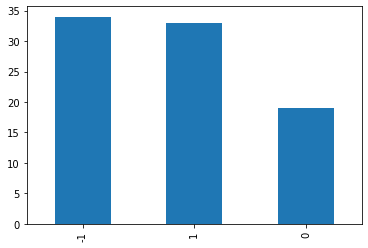

In [9]:
df_38['label'].value_counts().plot(kind='bar')

In [10]:
print('데이터 개수 :',len(df_38)) 

데이터 개수 : 86


In [11]:
df_38[:5]

,title,content,label
date,,,
2020-09-04,[제목 : [오아시스]\n 팬데믹시대에 내마음의 표준을 바꾸는 유통 ],이번 코로나가 유통시장의 판도를 5년이상 앞당겨진 변화를 가져 왔다?매장에서 인테넷...,1
2021-04-17,[제목 : [오아시스] 오아시스 매수 했습니다. ][제목 : [오아시스] 오아시스 ...,"오아이스 주식 중 pe가 보유한 물량이 시장에서 움직이는 듯 하네요.어제, 아시는...",0
2021-04-19,[제목 : [오아시스] 70만원이면 비싼건가요 ],"30주 70만원에 살려고하는데, 비싼건가요//",-1
2021-04-22,[제목 : [오아시스] 70만원이면 비싼건가요 ],어디서 70만원에 살수있어요?나도 사고 싶다//,1
2021-04-23,[코멘트 : [오아시스] pe가뭐에요? ][제목 : [오아시스] 망설이다가 못 샀네요 ],"pe가뭐에요?//70만원에 살까 말까 고민하고 있는데,팔렸다고 하네요.""빨간색매물검...",0


In [17]:
# for i in range(5):
#     print(df_38[(i-1)*20:i*20])

Empty DataFrame
Columns: [title, content, label]
Index: []
                                                        title  \
date                                                            
2020-09-04              제목    오아시스   팬데믹시대에 내마음의 표준을 바꾸는 유통     
2021-04-17   제목    오아시스  오아시스 매수 했습니다    제목    오아시스  오아시스 ...   
2021-04-19                         제목    오아시스  70만원이면 비싼건가요     
2021-04-22                         제목    오아시스  70만원이면 비싼건가요     
2021-04-23   코멘트    오아시스  pe가뭐에요    제목    오아시스  망설이다가 못 샀네요     
2021-04-26   제목    오아시스  위에글 바이럴 기가 막히네요  ㅋㅋㅋㅋ   제목    오아시...   
2021-04-28   제목    오아시스  비싸도 너무 비싸네요   코멘트    오아시스  그래도 지금...   
2021-05-05                          제목    오아시스  비싸도 너무 비싸네요     
2021-05-06                        제목    오아시스  오아시스상장 언제 하나요     
2021-05-11           제목    오아시스  옆   집  수수수지   그렇게 할 일 없냐       
2021-05-13                             제목    오아시스  거래는 뜸하네요     
2021-05-14        코멘트    오아시스  ㅋㅋㅋ 그놈 싸게 올렸길래 함 사볼라고 했더니 거래     
2021-05-16           제목    오아시스

### 제목과 본문 합치기

In [41]:
df_38['content'] = df_38['title'] + df_38['content']

In [44]:
df_38 = df_38.drop(columns=['title'])

In [76]:
df_38

,content,label
date,,
2020-09-04,제목 오아시스 팬데믹시대에 내마음의 표준을 바꾸는 유통 이번 코로나가 ...,1
2021-04-17,제목 오아시스 오아시스 매수 했습니다 제목 오아시스 오아시스 ...,0
2021-04-19,제목 오아시스 70만원이면 비싼건가요 30주 70만원에 살려고하는데 비...,-1
2021-04-22,제목 오아시스 70만원이면 비싼건가요 어디서 70만원에 살수있어요 나도 ...,1
2021-04-23,코멘트 오아시스 pe가뭐에요 제목 오아시스 망설이다가 못 샀네...,0
...,...,...
2022-07-27,코멘트 오아시스 구라치치말고 아는거 있음 그냥 직접 올려 구라치치말고 아...,1
2022-08-31,제목 오아시스 우크라이나와 러시아 제목 오아시스 오늘 날짜 20...,-1
2022-09-02,제목 오아시스 이 시기에 오히려 주목해야 할 기업 연일 금리가 급등하고 ...,1


### train, test data 나누기

In [46]:
df_38_shuffle = sklearn.utils.shuffle(df_38)
df_38_shuffle.head()

,content,label
date,,
2021-12-07,코멘트 오아시스 2조이상 2조이상,-1
2021-12-30,제목 오아시스 2조부터 시작 공모가가 공모가가 2조 어라운드 되지 않...,-1
2021-04-22,제목 오아시스 70만원이면 비싼건가요 어디서 70만원에 살수있어요 나도 ...,1
2022-03-21,제목 오아시스 와 액분 50배라니 날아갑시다 액분 진짜인가요,-1
2022-09-08,제목 오아시스 위기에 재조명받는 오아시스 미트박스 흑자비결은 오아시...,-1


In [47]:
train_ratio = 0.8
train_range = int(len(df_38_shuffle) * train_ratio)
train_range

68

In [48]:
train_data = df_38_shuffle[:train_range]
test_data = df_38_shuffle[train_range:]

In [49]:
print(len(train_data), len(test_data))

68 18


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 2021-12-07 to 2021-05-13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  68 non-null     object
 1   label    68 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [51]:
train_data.isnull().sum()

content    0
label      0
dtype: int64

### 데이터 정제하기

In [53]:
# 특수문자 제거 정규표현식

# df_38['title'] = df_38['title'].str.replace(r"[^\uAC00-\uD7A30-9a-zA-Z\s]",'')
# train_data["title"] = train_data["title"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
# df_38['content'] = df_38['content'].str.replace(r"[^\uAC00-\uD7A30-9a-zA-Z\s]",'')
train_data["content"] = train_data["content"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

/var/folders/1d/lfkpl6ps02xgh0rdprtbmgvw0000gn/T/ipykernel_1449/3127715996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["content"] = train_data["content"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)


In [ ]:
# content가 없는 데이터를 삭제하고 안하고는 선택사항일듯 -> 삭제하지 않는 것으로
'''
df_38['title'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df_38['content'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df_38 = df_38.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df_38))
'''

### 토큰화

In [54]:
import csv

In [55]:
with open('stopword_add.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    data = list(reader)

In [56]:
stopword_add = sum(data, [])
stopword_add

['오아시스',
 '내',
 '을',
 '주',
 '식이',
 '요',
 '이면',
 'pe',
 '뭐',
 '에요',
 '위',
 '글',
 '기',
 '때',
 '옆',
 '집',
 '그렇게',
 '일',
 '그',
 '놈',
 '함',
 '알다',
 '1',
 '71',
 '년',
 '안',
 '영',
 '억',
 '임',
 '네',
 '실',
 '137만',
 '가격',
 '다르다',
 '나',
 'K',
 '삼촌',
 '있다',
 '한데',
 '200',
 '얘기',
 '14677',
 '로',
 '이다',
 '에서',
 '입니다',
 '팔',
 '라고',
 '4',
 '대',
 '시',
 '총',
 '평',
 '어떻다',
 '전',
 '3000000',
 '후',
 '액',
 '분과',
 '신',
 '적',
 '주네',
 '수',
 '드리다',
 '요나',
 '분',
 '성은',
 '5',
 '백원',
 '주식',
 '수가',
 '하',
 '지',
 '바로',
 '몇',
 '일이',
 '죠',
 '향',
 '다',
 '업자',
 '만',
 '뭔',
 '건가',
 '기업',
 '벨',
 '류',
 '된거',
 '치다',
 '이상',
 '누구',
 '이름',
 '인가',
 '아시',
 '부터',
 '작',
 '공',
 '모',
 '가가',
 '장',
 '극',
 '40',
 '시간',
 '2',
 '지다',
 '50분',
 '내용',
 '50',
 '배',
 '써다',
 '29일',
 '까지',
 '날짜',
 '4월',
 '저',
 '3',
 '관련',
 '기준',
 '및',
 '52일',
 '조',
 '라',
 '쓰다',
 '어디',
 '어나',
 '오는',
 '즈',
 '아',
 '성',
 '순',
 '익',
 '중',
 '인데',
 '20220831']

In [57]:
# 불용어

stopwords = stopword_add + ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','\n','\n ', '제목']
stopwords

['오아시스',
 '내',
 '을',
 '주',
 '식이',
 '요',
 '이면',
 'pe',
 '뭐',
 '에요',
 '위',
 '글',
 '기',
 '때',
 '옆',
 '집',
 '그렇게',
 '일',
 '그',
 '놈',
 '함',
 '알다',
 '1',
 '71',
 '년',
 '안',
 '영',
 '억',
 '임',
 '네',
 '실',
 '137만',
 '가격',
 '다르다',
 '나',
 'K',
 '삼촌',
 '있다',
 '한데',
 '200',
 '얘기',
 '14677',
 '로',
 '이다',
 '에서',
 '입니다',
 '팔',
 '라고',
 '4',
 '대',
 '시',
 '총',
 '평',
 '어떻다',
 '전',
 '3000000',
 '후',
 '액',
 '분과',
 '신',
 '적',
 '주네',
 '수',
 '드리다',
 '요나',
 '분',
 '성은',
 '5',
 '백원',
 '주식',
 '수가',
 '하',
 '지',
 '바로',
 '몇',
 '일이',
 '죠',
 '향',
 '다',
 '업자',
 '만',
 '뭔',
 '건가',
 '기업',
 '벨',
 '류',
 '된거',
 '치다',
 '이상',
 '누구',
 '이름',
 '인가',
 '아시',
 '부터',
 '작',
 '공',
 '모',
 '가가',
 '장',
 '극',
 '40',
 '시간',
 '2',
 '지다',
 '50분',
 '내용',
 '50',
 '배',
 '써다',
 '29일',
 '까지',
 '날짜',
 '4월',
 '저',
 '3',
 '관련',
 '기준',
 '및',
 '52일',
 '조',
 '라',
 '쓰다',
 '어디',
 '어나',
 '오는',
 '즈',
 '아',
 '성',
 '순',
 '익',
 '중',
 '인데',
 '20220831',
 '의',
 '가',
 '이',
 '은',
 '들',
 '는',
 '좀',
 '잘',
 '걍',
 '과',
 '도',
 '를',
 '으로',
 '자',
 '에',
 '와',
 '한',
 '하다',


In [58]:
okt = Okt()

In [59]:
X_train = []
for sentence in tqdm(train_data['content']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████| 68/68 [00:01<00:00, 38.21it/s]


In [65]:
X_test = []
for sentence in tqdm(test_data['content']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 216.28it/s]


### 정수 인코딩

In [61]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [62]:
print(tokenizer.word_index)

{'상장': 1, '되다': 2, '보다': 3, '코멘트': 4, '투자': 5, '않다': 6, '가치': 7, '청구': 8, '1조': 9, '없다': 10, '컬리': 11, '오다': 12, '액면': 13, '분할': 14, '마켓': 15, '매출': 16, '거래': 17, '것': 18, '고': 19, '지금': 20, '가다': 21, '비싸다': 22, '내년': 23, '2조': 24, '이익': 25, '공모': 26, '받다': 27, '영업': 28, '인': 29, '증권': 30, '적자': 31, '회사': 32, '올해': 33, '물류': 34, '같다': 35, '약': 36, '흑자': 37, '센터': 38, '등': 39, 'ipo': 40, '시장': 41, '성장': 42, '말': 43, '넘다': 44, '올리다': 45, '너무': 46, '발행': 47, '실적': 48, '하고': 49, '업계': 50, '평가': 51, '아니다': 52, '사다': 53, '겁니다': 54, '매수': 55, '들어오다': 56, '듯': 57, '진행': 58, '싶다': 59, '상반기': 60, '높다': 61, '계획': 62, '기업가': 63, '더': 64, '작업': 65, '사': 66, '먹다': 67, '000': 68, '그렇다': 69, '나오다': 70, '하반기': 71, '되어다': 72, '신청': 73, '반기': 74, '70만원': 75, '가요': 76, '최근': 77, '수준': 78, '한국': 79, '못': 80, '주다': 81, '밖에': 82, '다른': 83, '돈': 84, '오늘': 85, '3조': 86, '100원': 87, '액면가': 88, '새벽': 89, '배송': 90, '목표': 91, '심사': 92, '밸류': 93, '2일': 94, '많이': 95, '규모': 96, '물량': 97, '하나요': 98, '시작': 99, '어디서': 1

In [63]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1106
등장 빈도가 2번 이하인 희귀 단어의 수: 884
단어 집합에서 희귀 단어의 비율: 79.92766726943941
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 44.46280991735537


희귀단어의 등장 빈도가 높기 때문에 제거하지 않는다

In [86]:
vocab_size = total_cnt

In [64]:
print(X_train[:3])

[['코멘트', '2조', '2조'], ['2조', '시작', '공모', '공모', '2조', '어', '라운드', '되다', '않다', '시초', '가다'], ['70만원', '비싸다', '가요', '어디서', '70만원', '살다', '나다', '사고', '싶다']]


In [66]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [67]:
X_train[:3]

[[4, 24, 24],
 [24, 99, 26, 26, 24, 415, 416, 2, 6, 417, 21],
 [75, 22, 76, 100, 75, 223, 224, 418, 59]]

In [68]:
y_train = np.array(train_data['label'])
x_train = np.array(test_data['label'])

In [69]:
y_train

array([-1, -1,  1, -1, -1,  1,  0,  0,  1, -1,  1,  1, -1,  1, -1,  0,  0,
       -1, -1, -1,  1,  1,  0, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1,  0,  0, -1,  1,  0, -1, -1,  0, -1,  1, -1, -1,  0,  1,
        1,  0,  0,  1, -1,  0,  1,  0, -1,  1,  1,  0,  0,  1,  0,  1,  1])

### 패딩

In [78]:
report = df_38['content'].values.tolist()

기사의 최대 길이 : 86
기사의 평균 길이 : 35.588235294117645


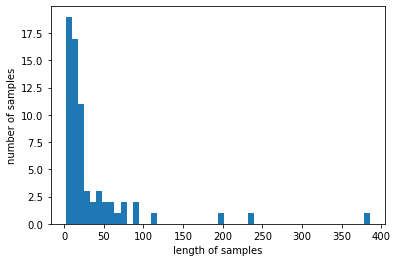

In [79]:
print('기사의 최대 길이 :',max(len(report) for review in X_train))
print('기사의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(report) for report in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [80]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [104]:
max_len = 100
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 100.0


In [84]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

### LSTM 모델

In [109]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100  # hidden layer의 node 개수, 100차원으로 학습
hidden_units = 128   # embedding 개수와 보통 맞추서 적는다, shape이 안 맞다고 나오면 embedding 차원과 연관되어있을 수 있다 # 보통 max_length와 맞춘다

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(3, activation='softmax')) # Dense 3개

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc']) # categorical, one-hot encoding 필요
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 
# batch size 줄여야 할듯, 68개 데이터밖에 없는데 64, 4 개 들어감
# 보통 데이터가 적으면 kcbert, kobert를 쓴다
# 머신러닝 모델을 써보는 것을 추천(데이터가 적기 때문) , 나이브베이즈 추천, decision tree classifier
# tfidf vectorize -> document turn metrix



Epoch 1/15


ValueError: in user code:

    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/lhs/miniforge3/envs/lhs/lib/python3.8/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible
